## Exam Instruction

**Files Provided:**

1. **`companies.csv`**: A dataset containing details of S&P 500 companies.
    - **Columns**:
        - `Name`: Name of the company.
        - `Ticker`: Stock ticker symbol of the company.
        - `Sector`: Industry sector to which the company belongs.

2. **`stock_prices.csv`**: A dataset with daily stock prices for the past year for the companies listed in `companies.csv`.
    - **Columns**:
        - Company tickers derived from the `companies.csv` file.
    - **Note**: The values in this dataset may not be exclusively in float type. There could be instances of `strings` and `NaN` types, which need to be handled for certain tasks.

**Tasks:**

**1. Plot Stock Prices vs. Time for Two Companies in One Plot:**

*Instructions:*
Plot the stock prices of **`ONEOK`** and **`Colgate-Palmolive`** against time for the past year. Make sure to label the x and y axes and show the title and legend. Also, the x axis should include date information.

**2. Plot Average Stock Price for Each Sector:**

*Instructions:*
First calculate the stock-level average price over the past year. Then, using the average of each stock over the past year, calculate the sector-level average price. Finaly, plot the sector-level average price. You can use any method of plotting. For example, bar chart. 

Elaborating, suppose that there are three stocks: A, B, C. You are given the prices over a year. First compute the mean price in mu_A, mu_B, and mu_C over the year. 
Then, group the stocks by sector. For example, stocks A and B might be in the Tech sector and C might be in the Medical sector. Then, compute the average over all stocks in each sector. In this case, we compute mu_tech = (mu_A + mu_B) / 2

Which sector has historically been the best for investment? 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

Question 1:

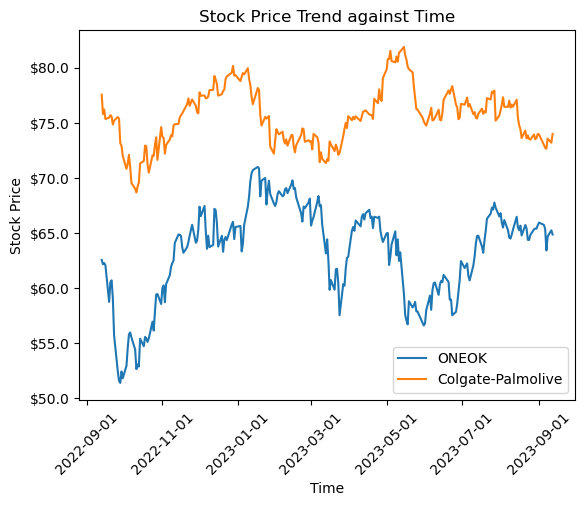

In [6]:
company = pd.read_csv("companies.csv",index_col=0)
stock_price = pd.read_csv("stock_prices.csv")
oneok_ticker = company.loc[company['Name']=='ONEOK','Ticker']  # OKE
colgate_ticker = company.loc[company['Name'] == 'Colgate-Palmolive','Ticker'] # CL

stock_price[['OKE','CL']].isnull().sum()  # no missing value
stock_price[['OKE','CL']] = stock_price[['OKE','CL']].astype('float64')
stock_price['Date'] = pd.to_datetime(stock_price['Date'])
# Plot
plt.plot(stock_price['Date'],stock_price['OKE'],label = "ONEOK")
plt.plot(stock_price['Date'],stock_price['CL'],label="Colgate-Palmolive")
plt.title("Stock Price Trend against Time")
plt.xlabel("Time")
plt.ylabel("Stock Price")
ticks = [50,55,60,65,70,75,80]
labels = [('$'+str(x)+'.0') for x in ticks]
plt.yticks(ticks=[50,55,60,65,70,75,80],labels=labels)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()


Question 2:

Answer: *From the image, we can see that over the past year, the `Consumer Staples` sector had the highest average stock price at `316.80` dollars per stock, which means it has been the best for investment. The `Health Care` sector comes second, with an average stock price of `243.68` dollars per stock.*

In [4]:
# find nan value
column_nan = stock_price.isnull().sum().reset_index()
column_nan.columns = ['Name','nan_value']
contain_nan = column_nan.loc[column_nan['nan_value']!=0,:]
# get the stock name who has nan value
name_with_nan = contain_nan['Name'].unique()
all_nan_list = []  
some_nan_list = []  # only ABMD not all NaN value
for name in name_with_nan:
# 
    if contain_nan.loc[contain_nan['Name']==name,'nan_value'].values == stock_price.shape[0]:
        all_nan_list.append(name)
    else:
        some_nan_list.append(name)

# we fill some_nan_list value with the average value and drop the column which has all columns are NaN value.
mean_value = stock_price['ABMD'].mean()
stock_price['ABMD'].fillna(mean_value,inplace=True)
stock_price.dropna(axis=1, inplace=True)

/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_2279/2601697832.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_price['ABMD'].fillna(mean_value,inplace=True)


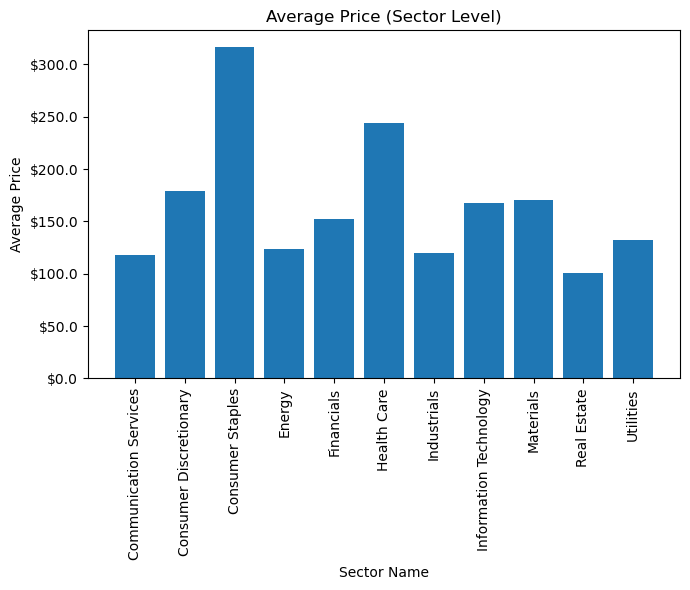

In [5]:
stock_name = company['Ticker'].unique()
stock_dict = {}


for name in stock_name:
    if name in all_nan_list:
        continue
    else:
        avg_stock_price = stock_price.loc[:,name].mean()
        stock_dict[name] = avg_stock_price

stock_avg_price = pd.DataFrame([stock_dict],index=['avg_price']).T
stock_avg_price.reset_index(inplace=True)
stock_avg_price.columns = ['stock_name','avg_price']

sector_level = pd.concat([company,stock_avg_price],axis=1)
sector_level.dropna(inplace=True,axis=0)
avg_sector_price = sector_level.groupby("Sector")['avg_price'].mean().reset_index()

avg_sector_price['avg_price'] = round(avg_sector_price['avg_price'],2)
# plot the barplot
plt.figure(figsize=(7,6))
plt.bar(avg_sector_price['Sector'],avg_sector_price['avg_price'])
plt.title("Average Price (Sector Level)")
ticks = [0,50,100,150,200,250,300]
labels = [('$'+str(x)+'.0') for x in ticks]
plt.yticks(ticks=ticks,labels=labels)
plt.xticks(rotation=90)
plt.xlabel("Sector Name")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()